This is the CLASSIFICATION jupyter notebook

In [1]:
# general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
# models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RT
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# preprocessing and set up
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS
from sklearn.model_selection import GridSearchCV

In [4]:
# scoring
from sklearn.metrics import roc_auc_score as ARS, precision_score as PS, accuracy_score as AS
from sklearn.metrics import recall_score as RS, f1_score as FS, confusion_matrix as CM
from sklearn.metrics import roc_curve as RC, roc_auc_score as RAS

In [5]:
ccfdf = pd.read_csv('creditcard.csv')
ccfdf.dropna()
ccfdf.info()
ccfdf.describe()
print(ccfdf["Class"].value_counts())
print(ccfdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
y = ccfdf["Class"]
X = ccfdf.drop("Class",axis = 1)
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

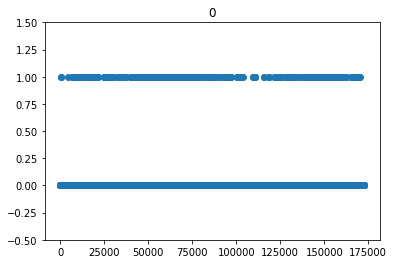

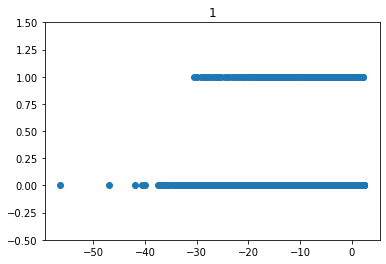

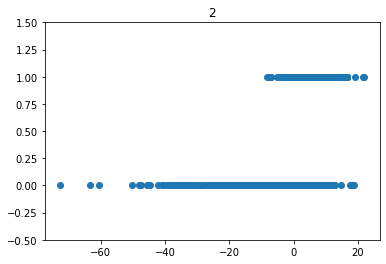

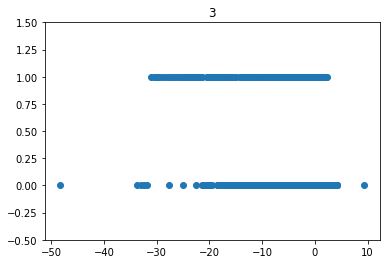

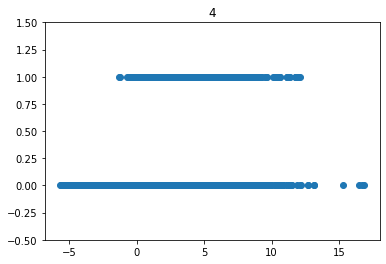

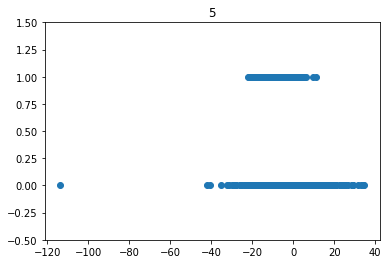

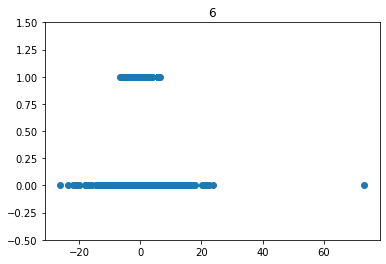

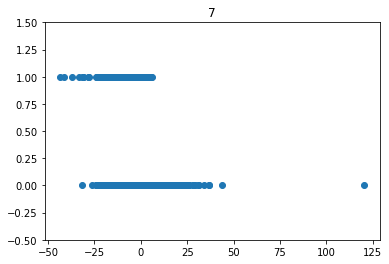

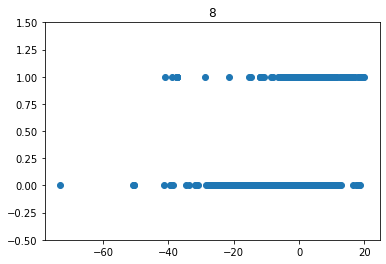

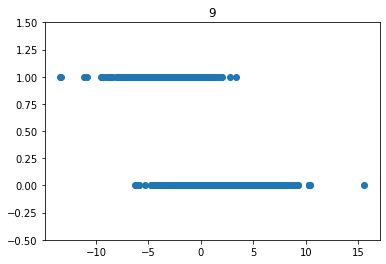

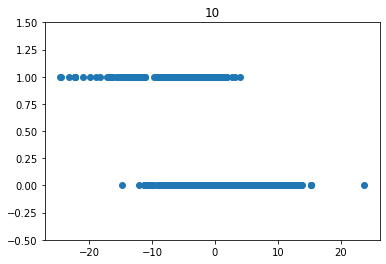

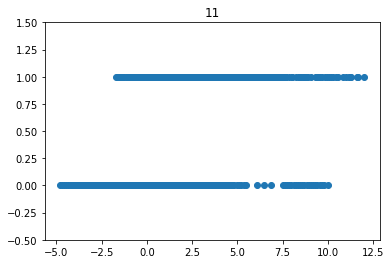

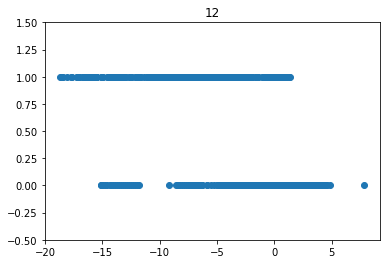

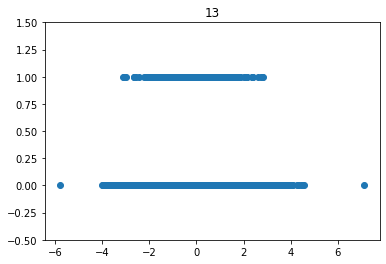

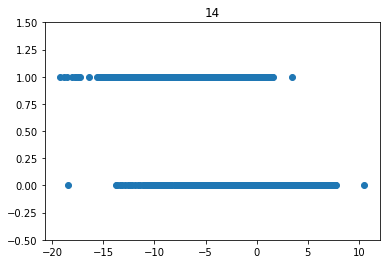

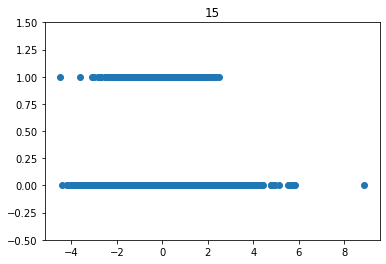

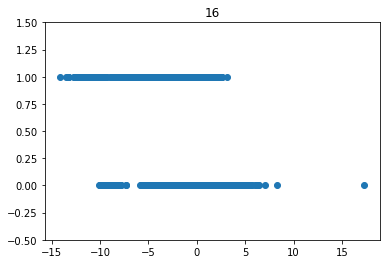

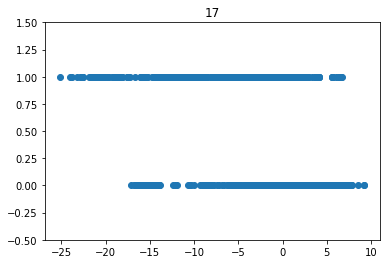

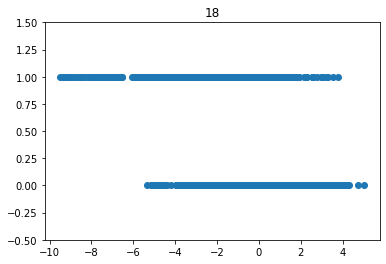

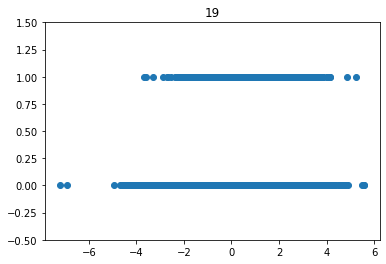

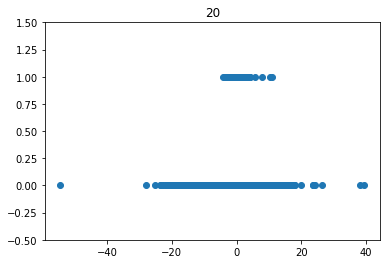

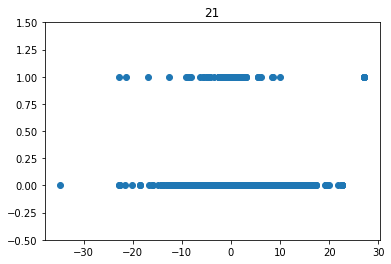

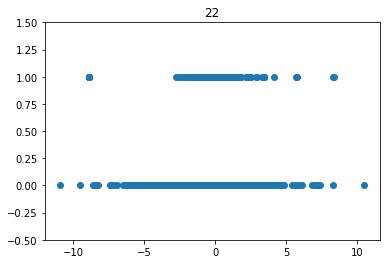

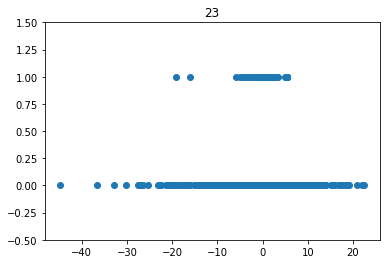

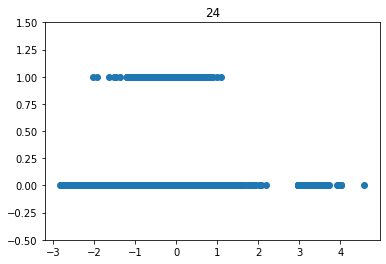

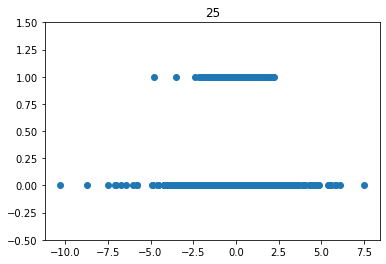

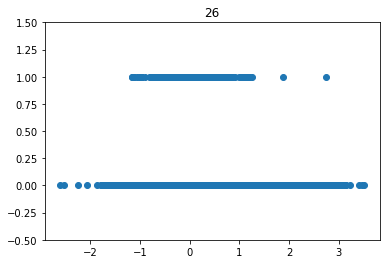

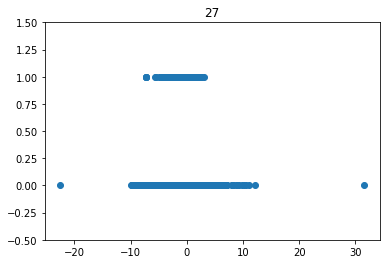

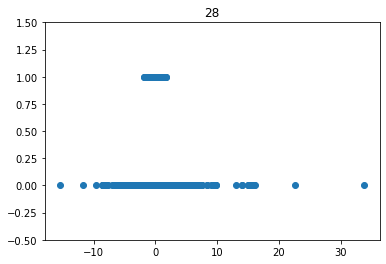

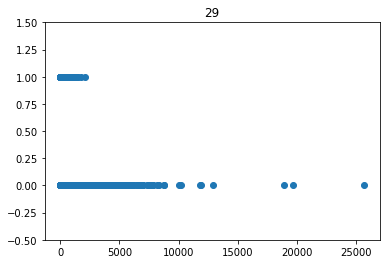

In [8]:
for i in range (0,30):
    plt.title("%d" % i)
    plt.scatter(X.iloc[:,[i]],y)
    plt.ylim(-.5,1.5)
    plt.show()

> Looking at these graphs graph "0" is not really indicative of Fraud, because the min and max of legitimate and fraudulent credit card usage is almost the same and the gaps of time where there are no fraudulent credit card use are so minimal it would do nothing to actually help train the modle. Also logically how would time affect someone trying to steal money?

In [9]:
X = X.drop("Time",axis = 1)
X.info()
X = X.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [10]:
print(X.shape)

(284807, 29)


> I am not really sure which is really better: oversampling or undersampling. From seemingly common sense it should be oversampling because one keeps all the original data, but i am not an expert. So, let us find out by using both.

In [11]:
# time to train because i want to go on a side of caution instead of 8:2 ration im going with a 7:3
x_tr_f, x_te, y_tr_f, y_te = tts(X,y, test_size = 0.3)
#over and under samplers
ros = ROS(random_state = 42) # why 42? why not 42 is the better question
rus = RUS(random_state = 42)
# resampling the training sets
xtr_os_f, ytr_os_f = ros.fit_resample(x_tr_f,y_tr_f) # (x) or (y) (TR)ain (u)ndersampled (S)ampled (F)ull
xtr_us_f, ytr_us_f = rus.fit_resample(x_tr_f,y_tr_f) # (x) or (y) (TR)ain (U)ndersampled (S)ampled (F)ull
# now for splitting for neural network i will revert to 8:2 for validation split
xtr_os, xtr_os_v, ytr_os, ytr_os_v = tts(xtr_os_f, ytr_os_f, test_size=0.2)
xtr_us, xtr_us_v, ytr_us, ytr_us_v = tts(xtr_us_f, ytr_us_f, test_size=0.2)

In [12]:
# Scaling for SVC and DNN, since decision tree aren't sensitive to feature scaling
#oversampling
scaler_os = StandardScaler()
sc_xtr_os_f = scaler_os.fit_transform(xtr_os_f)
sc_xtr_os = scaler_os.transform(xtr_os)
sc_xte_os = scaler_os.transform(x_te)
sc_xte_os_v = scaler_os.transform(xtr_os_v)
#undersampling
scaler_us = StandardScaler()
sc_xtr_us_f = scaler_us.fit_transform(xtr_us_f)
sc_xtr_us = scaler_us.transform(xtr_us)
sc_xte_us = scaler_us.transform(x_te)
sc_xte_us_v = scaler_us.transform(xtr_us_v)

> I have decided to break my classifification into 3 notebooks so i can run them while my Random forest gridsearch is running

# SVC

In [13]:
# im going to train a linear SVC with probability set to True like True like hw4
os_svc = SVC(kernel = 'linear', probability = True)
us_svc = SVC(kernel = 'linear', probability = True)

In [14]:
us_svc.fit(sc_xtr_us_f,ytr_us_f)

SVC(kernel='linear', probability=True)

In [15]:
sc_xtr_os_f.shape,ytr_os_f.shape

((398056, 29), (398056,))

In [16]:
os_svc.fit(sc_xtr_os_f[:50000],ytr_os_f[:50000])

SVC(kernel='linear', probability=True)

In [17]:
os_svc_pred = os_svc.predict(sc_xte_os)
us_svc_pred = us_svc.predict(sc_xte_us)

In [18]:
print("For Oversampled: ")
os_svc_cm = CM (y_te,os_svc_pred)
print(os_svc_cm)
print('\n')
print("For Undersampled: ")
us_svc_cm = CM (y_te,us_svc_pred)
print(us_svc_cm)

For Oversampled: 
[[85266    21]
 [   30   126]]


For Undersampled: 
[[83335  1952]
 [   13   143]]


In [19]:
print("For Oversampled: ")
print('Accuracy: {}'.format(AS(y_te, os_svc_pred)))
print('Precision: {}'.format(PS(y_te, os_svc_pred)))
print('Recall: {}'.format(RS(y_te, os_svc_pred)))
print('F1 Score: {}'.format(FS(y_te, os_svc_pred)))
print('\n')
print("For Undersampled: ")
print('Accuracy: {}'.format(AS(y_te, us_svc_pred)))
print('Precision: {}'.format(PS(y_te, us_svc_pred)))
print('Recall: {}'.format(RS(y_te, us_svc_pred)))
print('F1 Score: {}'.format(FS(y_te, us_svc_pred)))

For Oversampled: 
Accuracy: 0.999403110845827
Precision: 0.8571428571428571
Recall: 0.8076923076923077
F1 Score: 0.8316831683168318


For Undersampled: 
Accuracy: 0.9770022120009831
Precision: 0.06825775656324583
Recall: 0.9166666666666666
F1 Score: 0.12705464238116393


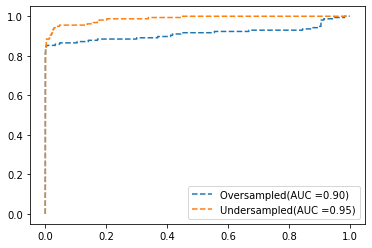

In [20]:
# lets plot the roc curves and document the area under the curve
os_svc_fpr, os_svc_tpr, _ = RC(y_te, os_svc.predict_proba(sc_xte_os)[:,1])
os_svc_auc = RAS(y_te, os_svc_pred)
plt.plot(os_svc_fpr, os_svc_tpr, linestyle='--', label = "Oversampled(AUC =%.2f)" % os_svc_auc)

us_svc_fpr, us_svc_tpr, _ = RC(y_te, us_svc.predict_proba(sc_xte_us)[:,1])
us_svc_auc = RAS(y_te, us_svc_pred)
plt.plot(us_svc_fpr, us_svc_tpr, linestyle='--', label = "Undersampled(AUC =%.2f)" % us_svc_auc)
plt.legend()
plt.show()